<a href="https://colab.research.google.com/github/snehaa-singh/projects/blob/main/IPL_DATAAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
import io

Saving matches.csv to matches.csv


In [ ]:
with open('matches.csv','r', encoding='utf8', errors ='ignore') as fin:
    data = fin.read()

In [ ]:
data=pd.read_csv('matches.csv')
matches= pd.DataFrame(data)

In [ ]:
with open('deliveries.csv','r', encoding='utf8', errors ='ignore') as fin:
    data1= fin.read()

In [ ]:
data=pd.read_csv('deliveries.csv')
deliveries= pd.DataFrame(data)

In [ ]:
matches.head(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri


In [ ]:
deliveries.head(2)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [ ]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [ ]:
list_of_teams = matches['team1'].tolist()+matches['team2'].tolist()
list_of_teams= list(set(list_of_teams))
list_of_teams

['Rising Pune Supergiant',
 'Chennai Super Kings',
 'Mumbai Indians',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Pune Warriors',
 'Deccan Chargers',
 'Gujarat Lions',
 'Delhi Capitals',
 'Sunrisers Hyderabad',
 'Delhi Daredevils',
 'Rajasthan Royals']

Number of Matches per Venue


In [ ]:
number_of_matches_per_venue = matches['venue'].value_counts()
number_of_matches_per_venue

venue
Eden Gardens                                            77
Feroz Shah Kotla                                        74
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk                         57
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Punjab Cricket Association IS Bindra Stadium, Mohali    21
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
M.Chinnaswamy Stadium                                   15
Kingsmead                                         

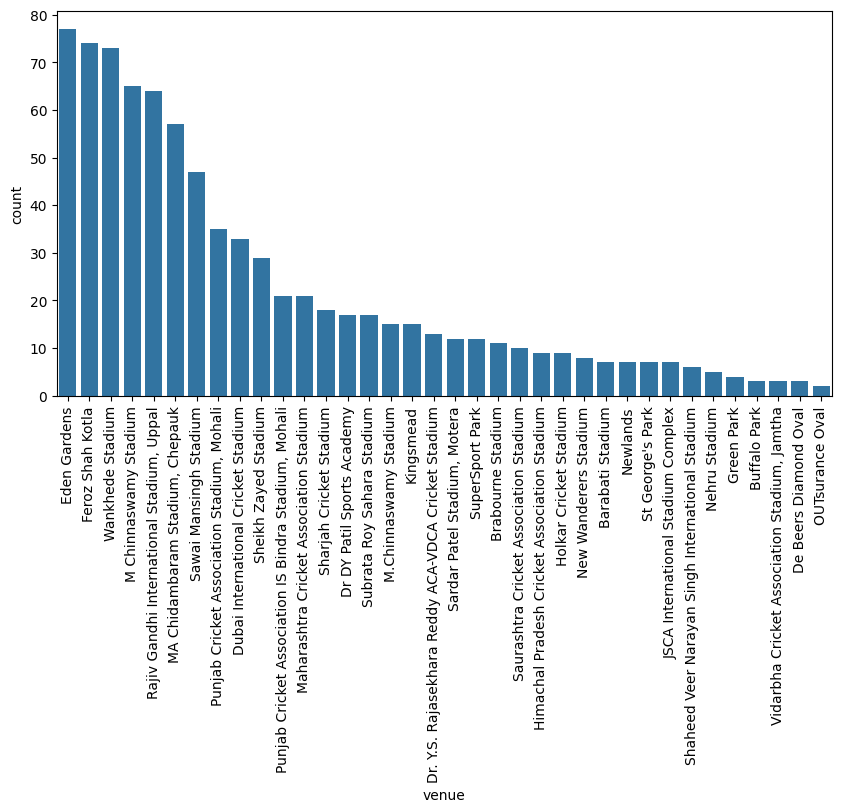

In [ ]:
plt.figure(figsize= (10,5))
sns.countplot(data=matches, x='venue', order=matches['venue'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Matches Played by Each Team

In [ ]:
matches_played_by_each_team = matches['team1'].value_counts() + matches['team2'].value_counts()
matches_played_by_each_team = matches_played_by_each_team.reset_index()
matches_played_by_each_team.columns = ['team', 'matches_played']
matches_played_by_each_team

,team,matches_played
0,Chennai Super Kings,178
1,Deccan Chargers,75
2,Delhi Capitals,33
3,Delhi Daredevils,161
4,Gujarat Lions,30
5,Kings XI Punjab,190
6,Kochi Tuskers Kerala,14
7,Kolkata Knight Riders,192
8,Mumbai Indians,203
9,Pune Warriors,46


<ipython-input-94-799b3d8aafb4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=matches_played_by_each_team, x='team', y='matches_played', palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Chennai Super Kings'),
  Text(1, 0, 'Deccan Chargers'),
  Text(2, 0, 'Delhi Capitals'),
  Text(3, 0, 'Delhi Daredevils'),
  Text(4, 0, 'Gujarat Lions'),
  Text(5, 0, 'Kings XI Punjab'),
  Text(6, 0, 'Kochi Tuskers Kerala'),
  Text(7, 0, 'Kolkata Knight Riders'),
  Text(8, 0, 'Mumbai Indians'),
  Text(9, 0, 'Pune Warriors'),
  Text(10, 0, 'Rajasthan Royals'),
  Text(11, 0, 'Rising Pune Supergiant'),
  Text(12, 0, 'Rising Pune Supergiants'),
  Text(13, 0, 'Royal Challengers Bangalore'),
  Text(14, 0, 'Sunrisers Hyderabad')])

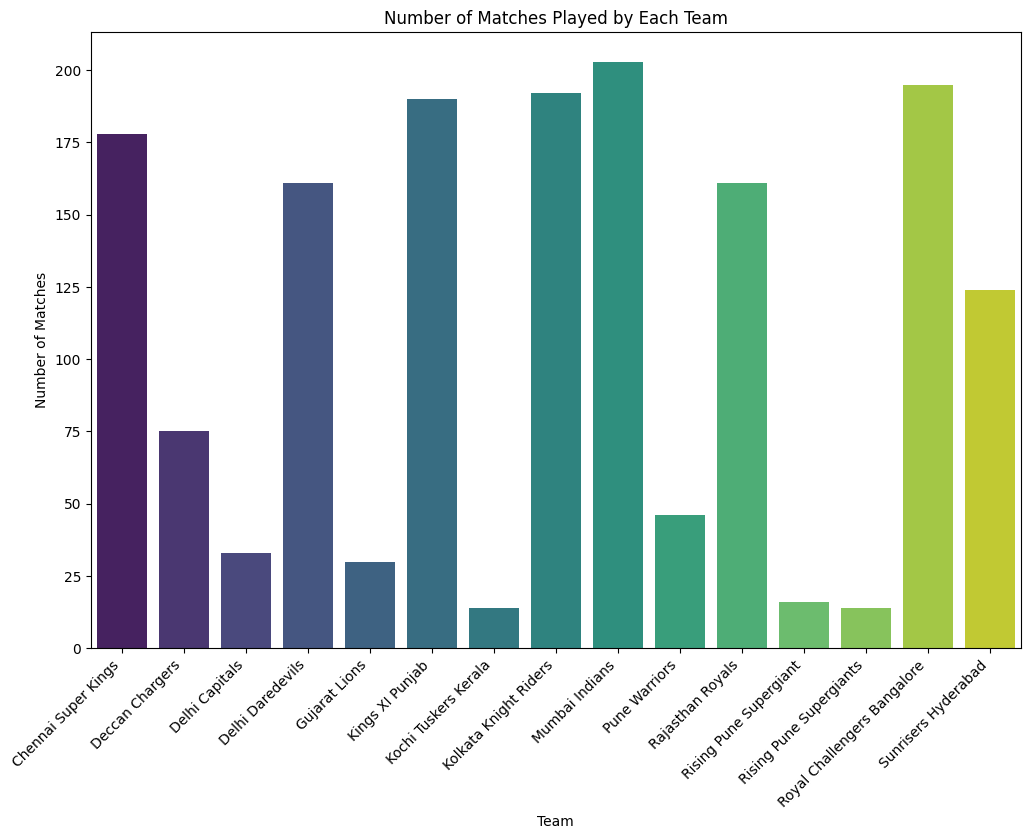

In [ ]:
# Create the bar plot
plt.figure(figsize=(12, 8))  # Set the figure size
sns.barplot(data=matches_played_by_each_team, x='team', y='matches_played', palette='viridis')

# Customize the plot
plt.title('Number of Matches Played by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')

Matches Won by Each Team


In [ ]:
Matches_Won_by_Each_Team = matches['winner'].value_counts()
Matches_Won_by_Each_Team = Matches_Won_by_Each_Team.reset_index()
Matches_Won_by_Each_Team.columns= ['team','matches_won']
Matches_Won_by_Each_Team

,team,matches_won
0,Mumbai Indians,120
1,Chennai Super Kings,106
2,Kolkata Knight Riders,99
3,Royal Challengers Bangalore,91
4,Kings XI Punjab,88
5,Rajasthan Royals,81
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,66
8,Deccan Chargers,29
9,Delhi Capitals,19


<ipython-input-98-d03e70735fa6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'team',y='matches_won',data = Matches_Won_by_Each_Team, palette= 'bright')


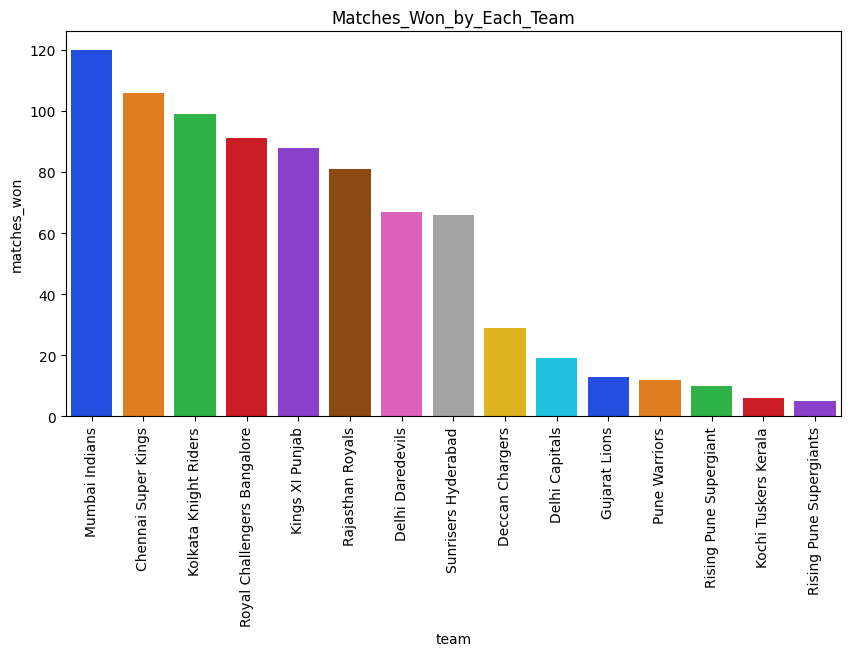

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x= 'team',y='matches_won',data = Matches_Won_by_Each_Team, palette= 'bright')
plt.xticks(rotation = 90)
plt.title('Matches_Won_by_Each_Team')
plt.show()

Top 5 Players with the Highest Number of Man of the Match Awards

In [ ]:
top_5_players = matches['player_of_match'].value_counts().head()
top_5_players = top_5_players.reset_index()
top_5_players.columns = ['player','man_of_the_match']
top_5_players

,player,man_of_the_match
0,AB de Villiers,23
1,CH Gayle,22
2,RG Sharma,18
3,DA Warner,17
4,MS Dhoni,17


Text(0.5, 1.0, 'Top 5 Players with the Highest Number of Man of the Match Awards')

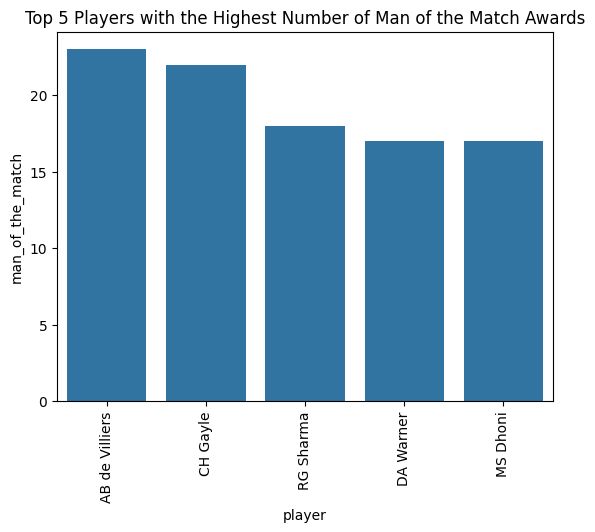

In [ ]:
sns.barplot(x='player',y='man_of_the_match',data=top_5_players)
plt.xticks(rotation ='vertical')
plt.xlabel('player')
plt.ylabel('man_of_the_match')
plt.title('Top 5 Players with the Highest Number of Man of the Match Awards')

The Top Batsman in the IPL

In [ ]:
top_batsman = deliveries.groupby('batsman')
top_batsman =top_batsman['batsman_runs'].sum()
top_batsman =top_batsman.reset_index()
top_batsman = top_batsman.sort_values(by='batsman_runs',ascending=False).head(10)
top_batsman

,batsman,batsman_runs
505,V Kohli,5878
438,SK Raina,5368
116,DA Warner,5254
379,RG Sharma,5230
407,S Dhawan,5197
24,AB de Villiers,4849
96,CH Gayle,4772
301,MS Dhoni,4632
398,RV Uthappa,4607
154,G Gambhir,4217


Text(0.5, 1.0, 'Top batsman in the IPL')

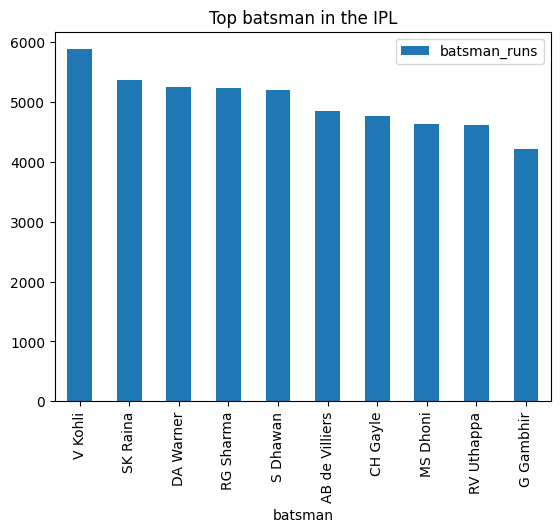

In [ ]:
top_batsman.plot(kind='bar',x='batsman',y='batsman_runs')
plt.title('Top batsman in the IPL')

The Bowler Who Has Given the Highest Number of Runs

In [ ]:
bowlers_given_highest_runs = deliveries.groupby(['bowler'])
bowlers_given_highest_runs = bowlers_given_highest_runs['total_runs'].sum()
bowlers_given_highest_runs = bowlers_given_highest_runs.reset_index().sort_values(by= 'total_runs',ascending= False).head()
bowlers_given_highest_runs

,bowler,total_runs
276,PP Chawla,4330
133,Harbhajan Singh,4038
6,A Mishra,3913
99,DJ Bravo,3869
281,R Ashwin,3756


Text(0.5, 1.0, 'The Bowler Who Has Given the Highest Number of Runs')

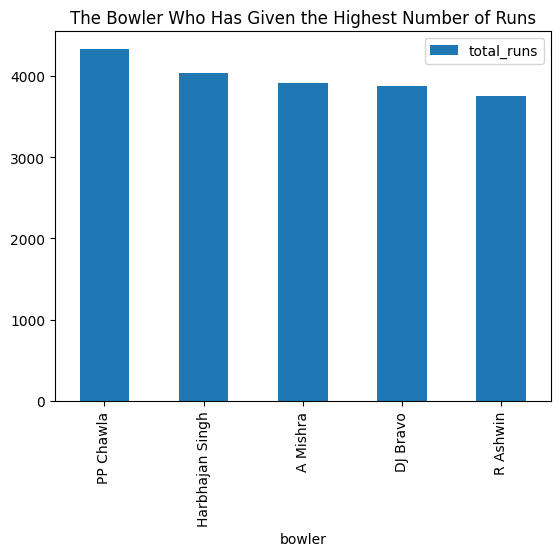

In [ ]:
bowlers_given_highest_runs.plot(kind='bar', x='bowler',y='total_runs')
plt.title('The Bowler Who Has Given the Highest Number of Runs')

The Bowler with Team-wise Performance


Let’s suppose you are playing against CSK and you have to find out which bowler’s performance was good in the previous years against this team

In [ ]:
deliveries.head(2)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


<Axes: xlabel='batting_team'>

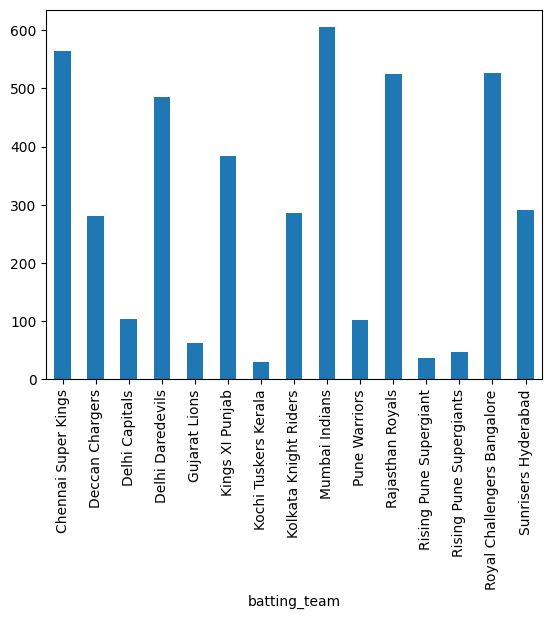

In [ ]:
mask=deliveries['bowler']=='PP Chawla'
deliveries[mask].groupby('batting_team')['total_runs'].agg('sum').plot(kind='bar')

It’s clear that if you have PP Chawla in your team then don’t let him play against MI, CSK, RCB, RR, and DC.

Over-wise Batting Performance of Each Team in the IPL (2008–2020)


<Axes: xlabel='over', ylabel='batting_team'>

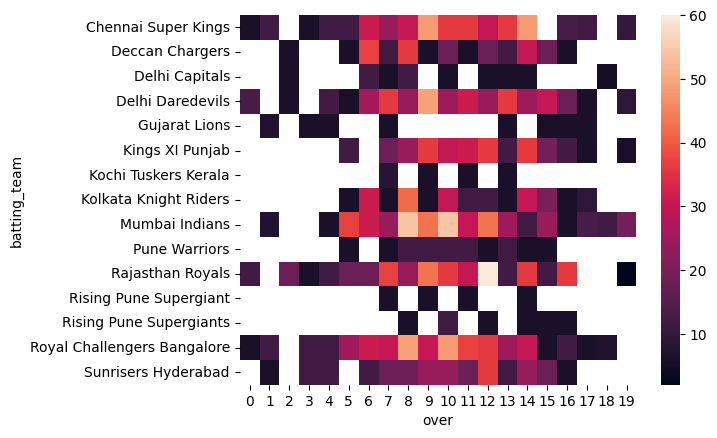

In [ ]:
overwise = deliveries[mask]
overwise = overwise[['batting_team','over','batsman_runs']]
x= overwise.pivot_table(index='batting_team',columns='over',values='batsman_runs',aggfunc='count')

sns.heatmap(x)

if you are playing against MI or CSK, then you have to play with your best bowling attack line-up from the first over. MI’s batsmen are silent in the second and third over, after that they go on rampage mode against their opponent. The same goes for CSK and RCB too. This data is not only helpful from the bowling team’s perspective but also the batting team. If you are a team manager and you see using this data that your team is not performing well in the death overs then you probably should focus on buying a good finisher in the next auction. As you see in the above heatmap, most of the teams are lagging at the end of the map, except CSK and MI.

I think that’s why MI and CSK are the two most successful franchises in the IPL.

how many runs Virat Kohli scored when he faced Jasprit Bumrah,

Sum of the run when the bowler is Bumrah and the batsman is V Kohli. You will get the output.

In [ ]:
mask = deliveries['batsman']=='V Kohli'
mask2 = deliveries['bowler']=='JJ Bumrah'
deliveries[mask2].groupby('batsman')['batsman_runs'].agg('count').sort_values(ascending=False)['V Kohli']

79